# 다차원 텐서 (다차원 배열)

In [21]:
import numpy as np

### 다차원 배열의 계산 복습

In [22]:
A = np.array([[1, 2, 3], 
              [4, 5, 6]])

B = np.array([[7, 8, 9], 
              [10, 11, 12]])

add_result = A + B

vec = np.array([1, 2, 3])
add_result2 = A + vec   # 브로드캐스팅 

print(add_result)
print(add_result2)

dot_result = A.dot(B.T)
print(dot_result)

[[ 8 10 12]
 [14 16 18]]
[[2 4 6]
 [5 7 9]]
[[ 50  68]
 [122 167]]


### 다차원 배열의 계산으로 순전파 구현

In [23]:
# 입력 데이터 
X = np.random.randn(4, 5)   # 4개의 샘플, 5차원 feature 

# 가중치 
W = np.random.randn(5, 3)   # 5개의 입력(feature), 3개의 뉴런으로 구성된 레이어 

# 편향
b = np.random.randn(1, 3)

# 선형 계산 (W*X + b)
z = np.dot(X, W) + b

# ReLU 활성화 함수
result = np.maximum(0, z)
print(result)

[[3.68612137 2.87965743 0.        ]
 [0.         0.         0.        ]
 [1.59825428 0.36787995 1.00281241]
 [0.         0.         0.        ]]


### 다층 퍼셉트론

In [24]:
X = np.random.randn(6, 10)

# 은닉층 10개의 입력 -> 8개의 뉴런
w1 = np.random.randn(10, 8)
b1 = np.random.randn(1, 8)

# 출력층 : 8개의 입력 -> 4개의 클래스
w2 = np.random.randn(8, 4)
b2 = np.random.randn(1, 4)

# 은닉층 계산 (선형 계산 + tanh 활성화 함수)
z1 = np.dot(X, w1) + b1
result1 = np.tanh(z1)

# 출력층 계산 (선형 계산 + softmax 활성화 함수)
z2 = np.dot(result1, w2) + b2
exp_z = np.exp(z2 - np.max(z2, axis=1, keepdims=True))
result2 = exp_z / np.sum(exp_z, axis=1, keepdims=True)

print(result2)


[[0.01661784 0.03145656 0.15576307 0.79616253]
 [0.12265974 0.87128326 0.00168303 0.00437397]
 [0.21057004 0.59665247 0.04408727 0.14869022]
 [0.00524108 0.00725451 0.27314895 0.71435546]
 [0.00124242 0.00668843 0.10210834 0.88996081]
 [0.64070725 0.31248235 0.01756165 0.02924876]]


### 이미지 데이터 예시

(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

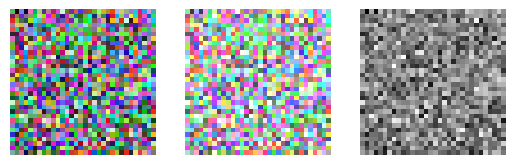

In [184]:
import matplotlib.pyplot as plt

# 이미지 생성 
batch_size = 5  # 샘플 개수 
channels = 3    # 색상, 흑백 / RGB를 적용하기 위해 3을 넣음 (흑백 이미지의 경우에는 채널 값을 생략하기도 함)
height = 32     # 이미지 크기
width = 32

images = np.random.rand(batch_size, channels, height, width) # 파이토치에서는 이 순서로 요소를 받는다 

bright_images = np.clip(images + 0.2, 0, 1)  # clip(): images에 브로드캐스팅으로 픽셀값을 더해 밝게 만들어주는데, 그 범위를 0과 1사이로 제한함  

gray_images = np.mean(images, axis=1)   # 평균을 내서 채널 수를 줄임.

# PyTorch 프레임워크에서는 이미지 데이터를 (채널, 높이, 너비) 순서로 저장
# matplotlib.pyplot.imshow()는 (높이, 너비, 채널) 순으로 기대
# 따라서 transpose()를 이용해 축의 순서를 재배열
images_for_display = images[0].transpose(1, 2, 0)   # 인덱스 위치로 바꿔줌  
bright_images_display = bright_images[0].transpose(1, 2, 0)

plt.subplot(1, 3, 1)
plt.imshow(images_for_display)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(bright_images_display)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gray_images[0], cmap='gray')
plt.axis('off')